# Remote Software Engineer Jobs

## Objective
Analyze the job postings to determine:

1. Desired skills and experience
2. Pay scale 
3. What company has the most postings
4. Variations in job title

## Understanding the Column Data
* Title: job title
* Company: name of company
* Salary: if a salary is listed, it is provided here
* Description: the job description / details of position

## Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/z/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/z/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
csv = '~/code/indeed-web-scraper/2022/datasets/2022-02-02_senior software engineer_remote.csv'
df = pd.read_csv(csv)
df.head()

,Title,Company,Location,Salary,Description
0,Senior Engineer (React/NodeJS) - Nordstrom Sty...,Nordstrom Inc,Remote,"$114,000 - $176,500 a year",\nDesigns software/network/systems deployment ...
1,Senior Software Engineer,Nordstrom Inc,+5 locationsRemote,"$114,000 - $176,500 a year",\nA Senior Engineer 1 is part of a key team of...
2,Senior Software Engineer for Web Development,General Dynamics Information Technology,+5 locationsRemote,"$77,875 - $130,062 a year","\nGDIT technologists, scientists, and innovato..."
3,Senior Software Engineer,Disney Streaming,"Remote in New York, NY+2 locations",None,"\nWork closely with our team of UX designers, ..."
4,Senior Software Engineer,Netflix,+5 locationsRemote,None,"\nYou will partner with Netflix engineers, JVM..."


## Graphs

### Job Titles

<AxesSubplot:xlabel='Title'>

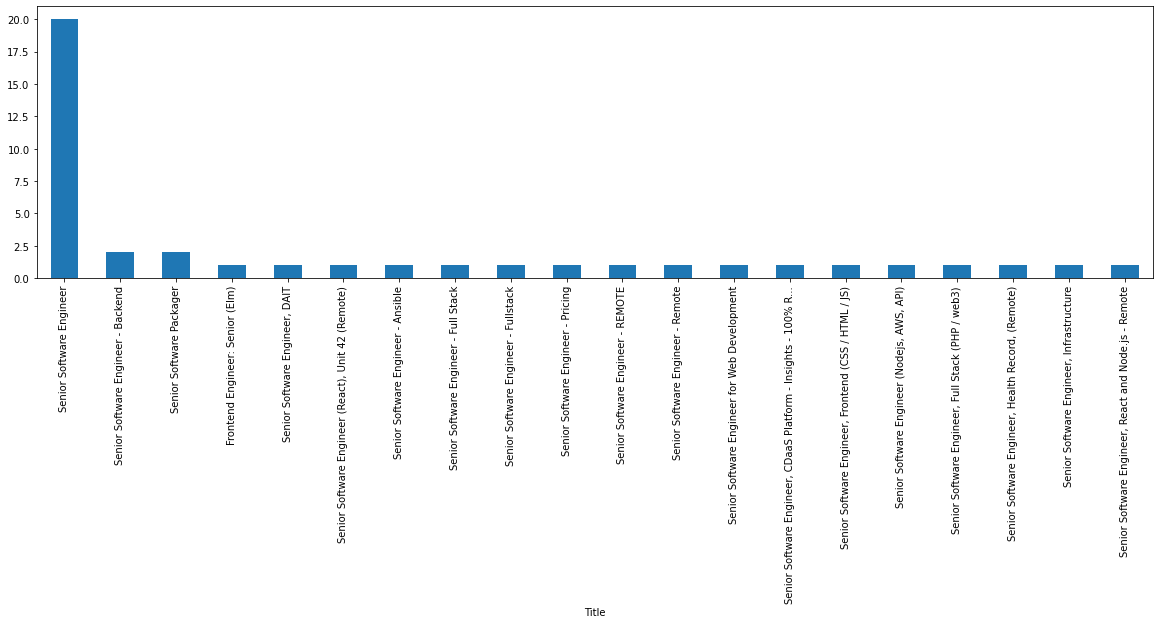

In [5]:
top_jobs = df.groupby("Title").count()["Location"].sort_values(ascending=False)[:20]
top_jobs.plot(kind="bar", figsize=(20,5))

### Companies

<AxesSubplot:xlabel='Company'>

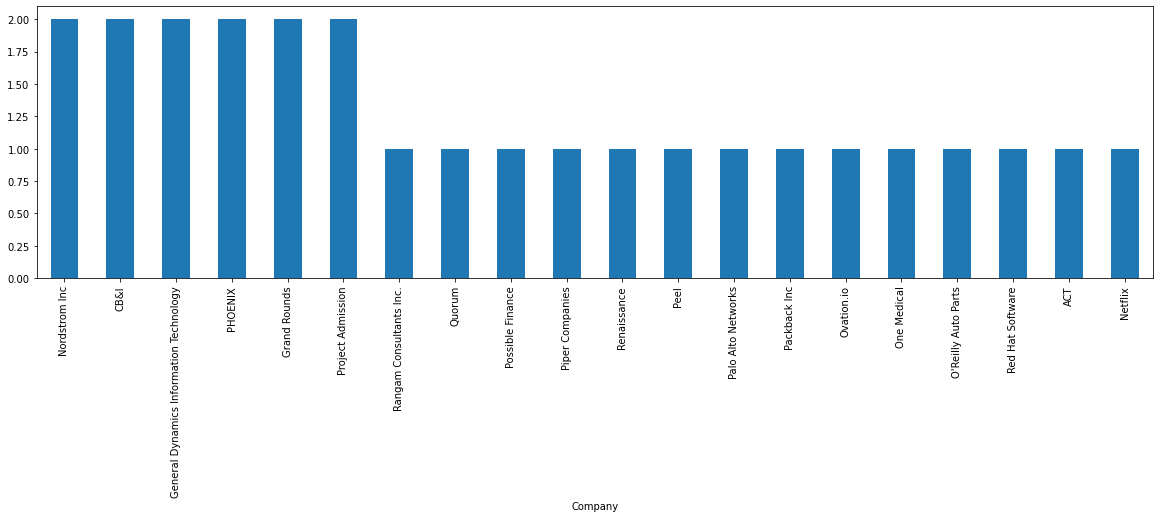

In [6]:
top_companies = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
top_companies.plot(kind="bar", figsize=(20,5))

### Locations

All of these are remote. Some may require being in a specific timezone. 

In [7]:
top_locations = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:20]
top_locations

Location
Remote                                     40
+1 locationRemote                           5
+5 locationsRemote                          4
Remote in New York, NY                      4
Remote in Denver, CO                        2
Remote in New York, NY+1 location           1
Remote in Springfield, MO+1 location        1
Remote in Santa Clara, CA                   1
Remote in San Francisco, CA+3 locations     1
Remote in Redmond, WA+11 locations          1
Remote in Raleigh, NC+5 locations           1
Remote in Provo, UT+1 location              1
Remote in New York, NY+7 locations          1
Remote in New York, NY+2 locations          1
Remote in Moline, IL                        1
+4 locationsRemote                          1
Remote in Frankfort, KY+1 location          1
Remote in Dania, FL                         1
Remote in Dallas, TX+1 location             1
Remote in Culver City, CA+4 locations       1
Name: Title, dtype: int64

### Salary

In [8]:
top_munnies = df.groupby("Salary").count()["Title"].sort_values(ascending=False)[:20]
top_munnies

Salary
None                          36
$114,000 - $176,500 a year     2
$77,875 - $130,062 a year      2
$120,000 - $150,000 a year     2
$50 - $60 an hour              2
$120,000 - $180,000 a year     2
$85,000 - $110,000 a year      1
$65 - $70 an hour              1
$65,000 - $150,000 a year      1
$70,000 - $100,000 a year      1
$79,560 - $140,400 a year      1
$90,000 - $125,000 a year      1
$91 an hour                    1
$95,000 - $140,000 a year      1
$98,000 - $159,400 a year      1
From $125,000 a year           1
From $72 an hour               1
$60 - $85 an hour              1
$100,000 - $110,000 a year     1
$50 - $55 an hour              1
Name: Title, dtype: int64

### Experience
The dataset only includes the summarized job description for now.

In [9]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [10]:
stop_words = stopwords.words('english')
tags_df = df["Description"].apply(cleanData)
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

#### AWS vs Azure

<AxesSubplot:>

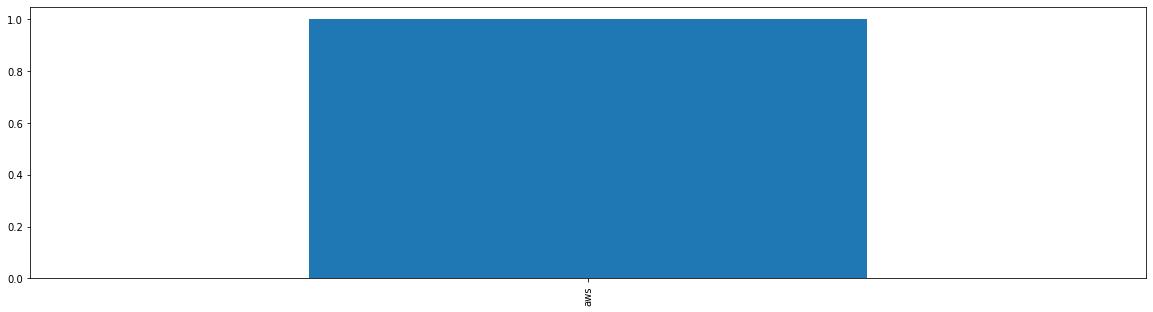

In [11]:
skills = ["aws","azure"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### Languages

<AxesSubplot:>

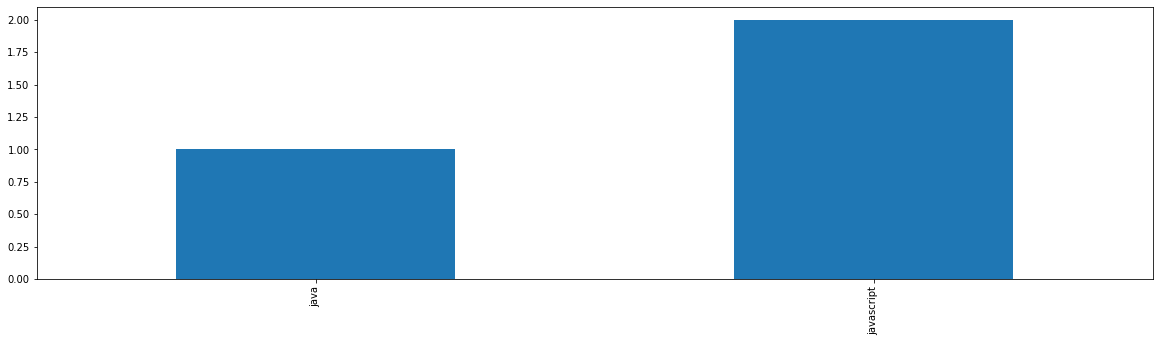

In [12]:
skills = ["java", "javascript", "c#", "sql", "python", "css", "html", "c++", "php", "typescript"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### Web Frameworks

<AxesSubplot:>

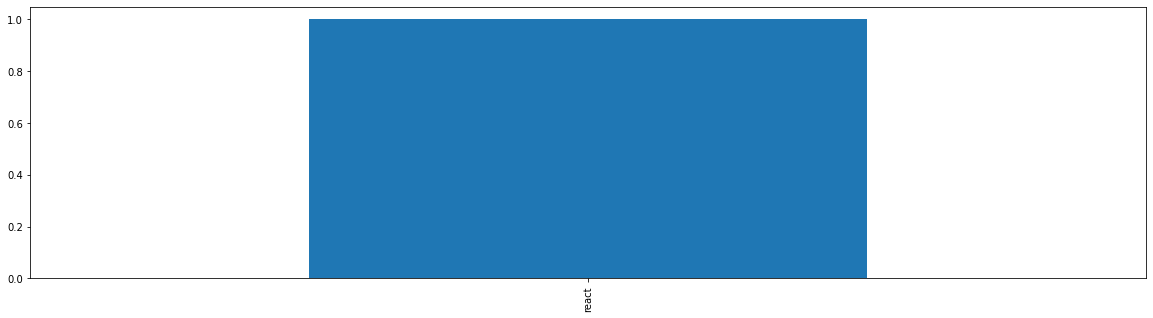

In [13]:
skills = ["jquery", "react", "angular", "asp.net", "express", "vue", "spring", "flask", "django", "laravel"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

#### Platforms

<AxesSubplot:>

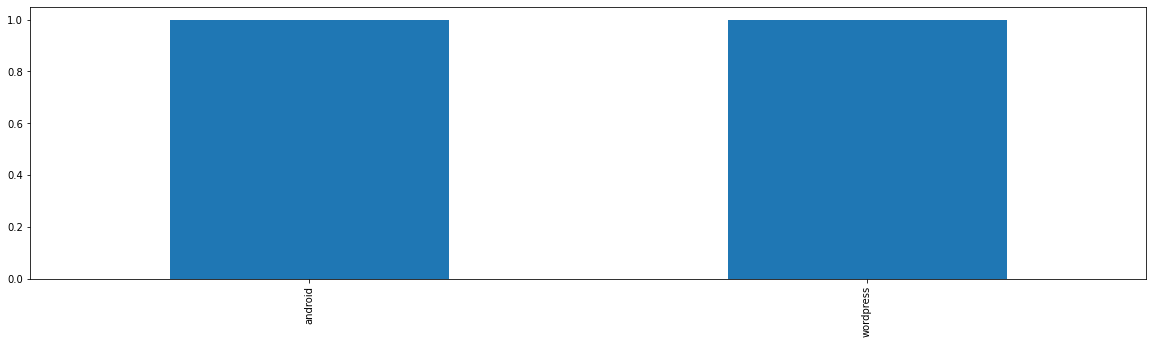

In [17]:
skills = ["linux", "windows", "macos", "ios", "android", "docker", "wordpress"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

## Summary

## Conclusion

Not having the full job description data severely impacts the results of our analysis. Despite this, we can see that Software Engineer skills like Java and Javascript are commonly mentioned.

You can expect to make around six figures or more when working in a remote Software Engineer role.

The top job title when searching "software engineer" is Senior Software Engineer.
